In [1]:
import os 

os.environ["ISISROOT"] = "/usgs/cpkgs/anaconda3_linux/envs/isis3.7.0"

import pysis
from pysis import isis
from pysis.exceptions import ProcessError

import knoten
from knoten import vis

import json

import ale
ale.config['mex'] = '/home/acpaquette/5270/'
from ale import util
from ale.drivers.mex_drivers import MexHrscPds3NaifSpiceDriver
from ale.formatters.usgscsm_formatter import to_usgscsm

from IPython.display import Image

import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
# url = 'https://pds-imaging.jpl.nasa.gov/data/mro/mars_reconnaissance_orbiter/ctx/mrox_3365/data/K11_057871_1602_XN_19S163W.IMG'

# !wget -N -P data/ {url}
# fileName = 'data/' + os.path.split(url)[1]
fileName = '/home/acpaquette/5270/h5270_0000_nd2.img'
camera = knoten.csm.create_csm(fileName)

In [3]:
# Set the output location of the resulting .cub
cub_loc = os.path.splitext(fileName)[0] + '.cub'

try: 
    isis.hrsc2isis(from_=fileName, to=cub_loc)
except ProcessError as e:
    print(e.stderr)

try:
    isis.spiceinit(from_=cub_loc, shape='ellipsoid', ckpredicted=True, spkpredicted=True)
except ProcessError as e:
    print(e.stderr)

# driver = MexHrscPds3NaifSpiceDriver(fileName)
# print(driver.metakernel)
    
# with MexHrscPds3NaifSpiceDriver(fileName) as driver:
#     usgscsmString = to_usgscsm(driver)
#     usgscsm_dict = json.loads(usgscsmString)
    
#     csm_isd = os.path.splitext(fileName)[0] + '.json'
#     json.dump(usgscsm_dict, open(csm_isd, 'w'))

In [4]:
csm_isd = os.path.splitext(fileName)[0] + '.json'

csmisis_diff_lv_plot, csmisis_diff_ephem_plot, external_orientation_data = vis.external_orientation_diff(csm_isd, cub_loc, 10, 50, 600, 600)

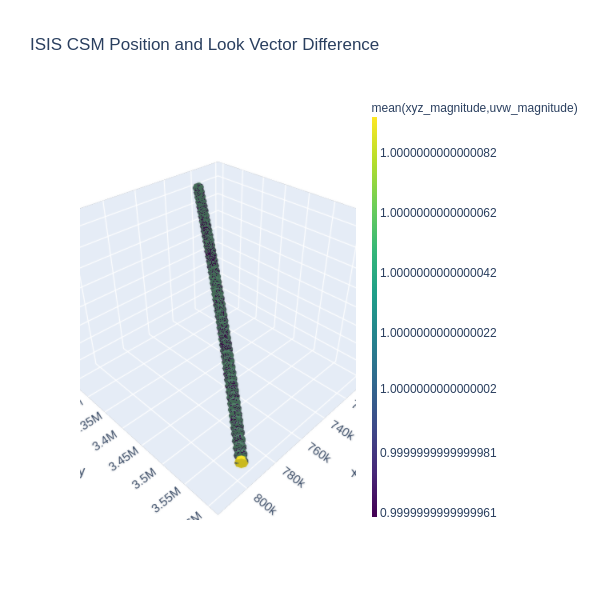

In [5]:
csmisis_diff_lv_plot_bytes = csmisis_diff_lv_plot.to_image(format="png")
csmisis_diff_ephem_plot_bytes = csmisis_diff_ephem_plot.to_image(format="png")
Image(csmisis_diff_lv_plot_bytes)

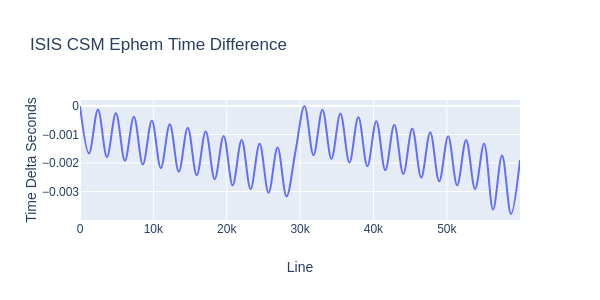

In [6]:
Image(csmisis_diff_ephem_plot_bytes)

In [7]:
external_orientation_data[['diffx', 'diffy', 'diffz', 'diffu', 'diffv', 'diffw']].describe()

,diffx,diffy,diffz,diffu,diffv,diffw
count,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,-7.402937e-01,-3.584682e+00,6.170305,0.003111,-0.000695,-0.000153
std,3.606895e-01,1.728150e+00,3.936748,0.000053,0.000175,0.000111
min,-1.428498e+00,-6.923374e+00,-0.255961,0.002984,-0.000999,-0.000381
25%,-1.056797e+00,-4.883797e+00,2.908075,0.003073,-0.000855,-0.000242
50%,-7.058700e-01,-3.739435e+00,6.364819,0.003123,-0.000696,-0.000155
75%,-4.714599e-01,-2.266006e+00,9.176892,0.003147,-0.000557,-0.000062
max,6.899936e-07,-1.201406e-07,15.081610,0.003197,-0.000369,0.000082


In [8]:
isis2csm_plot, csm2isis_plot, isiscsm_plotlatlon, isiscsm_plotbf, isis2csm_data, csm2isis_data, isiscsm_latlondata, isiscsm_bfdata = vis.reprojection_diff(csm_isd, cub_loc, 10, 50, 500, 500)

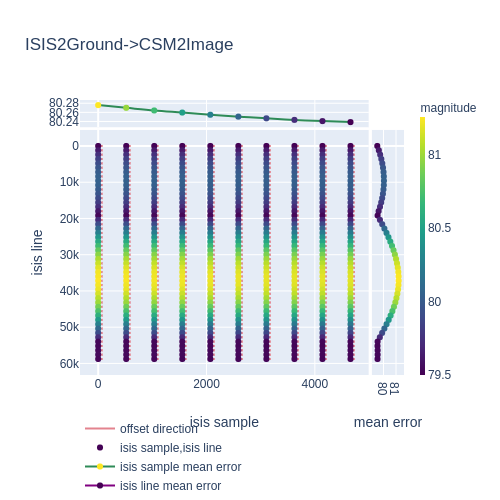

In [9]:
Image(isis2csm_plot.to_image())

In [10]:
isis2csm_data[['diff sample', 'diff line']].describe()

,diff sample,diff line
count,500.000000,500.000000
mean,80.135308,3.285021
std,0.452138,2.911701
min,79.498003,0.071298
25%,79.731556,0.620367
50%,80.017446,2.202380
75%,80.588626,6.376477
max,80.922767,8.272033


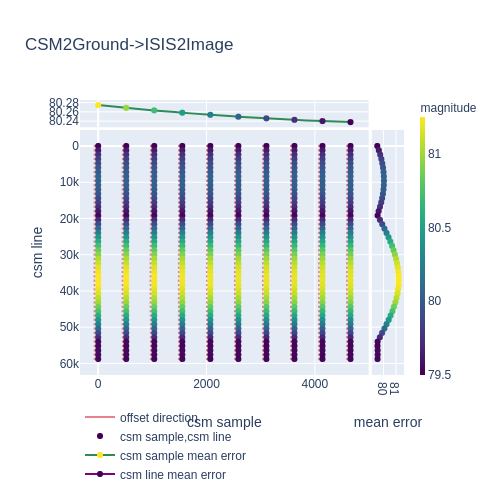

In [11]:
Image(csm2isis_plot.to_image())

In [12]:
csm2isis_data[['diff sample', 'diff line']].describe()

,diff sample,diff line
count,500.000000,500.000000
mean,-80.134110,-3.287926
std,0.451107,2.912443
min,-80.921026,-8.283506
25%,-80.585063,-6.366321
50%,-80.016934,-2.166003
75%,-79.731369,-0.623621
max,-79.500000,0.000000


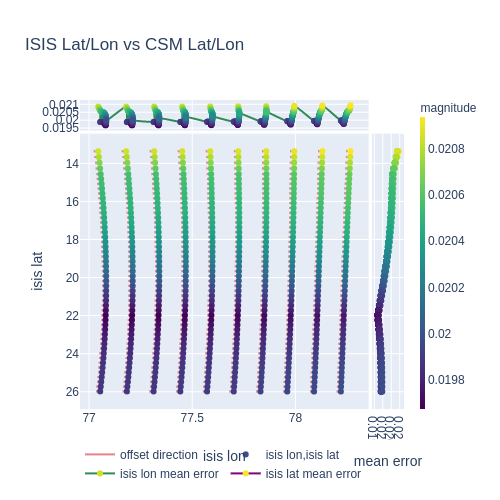

In [13]:
Image(isiscsm_plotlatlon.to_image())

In [ ]:
Image(isiscsm_plotbf.to_image())

In [ ]:
isiscsm_bfdata[['diffx', 'diffy', 'diffz']].describe()